<a href="https://colab.research.google.com/github/jagritishahi/FakeNewsDetection/blob/master/Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Declare variables
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

### **Importing and loading Dataset**

In [2]:
df1=pd.read_json("https://raw.githubusercontent.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection/master/Sarcasm_Headlines_Dataset.json",lines=True)
df1.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


### **`Splitting Dataset**

In [4]:
# Create subsets for sentences and labels
sentences = df1.headline
labels = df1.is_sarcastic
# Create training subsets
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]
# Create testing subsets
testing_sentences  = sentences[training_size:]
testing_labels = labels[training_size:]

### **Tokenization**

In [5]:
# Initialize tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
# Fitting the training sentences
tokenizer.fit_on_texts(training_sentences)
# Create a words dictionary
word_index = tokenizer.word_index

### **Sequencing**

In [6]:
# Create sequences of tokens that represent each sentence 
training_sequences = tokenizer.texts_to_sequences(training_sentences)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

### **Padding**

In [7]:
# Create padding sequences for training sentences 
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)
# Create padding sequences for testing sentences 
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

### **Training**

In [8]:
# Convert the sets to array to get it to work with TensorFlow 2
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

### **Embedding**

In [9]:
# Create a model
model = tf.keras.Sequential([
    # Embedding layer for NN                         
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # Global Average pooling is similar to adding up vectors
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')                             
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
# Train the model
epoch_num = 30
history = model.fit(training_padded, 
                    training_labels, 
                    epochs = epoch_num, 
                    validation_data = (testing_padded, testing_labels), verbose = 2)

Epoch 1/30
625/625 - 2s - loss: 0.6647 - accuracy: 0.6027 - val_loss: 0.5510 - val_accuracy: 0.7964
Epoch 2/30
625/625 - 2s - loss: 0.4212 - accuracy: 0.8339 - val_loss: 0.3763 - val_accuracy: 0.8369
Epoch 3/30
625/625 - 2s - loss: 0.3125 - accuracy: 0.8744 - val_loss: 0.3429 - val_accuracy: 0.8545
Epoch 4/30
625/625 - 2s - loss: 0.2619 - accuracy: 0.8974 - val_loss: 0.3353 - val_accuracy: 0.8532
Epoch 5/30
625/625 - 2s - loss: 0.2258 - accuracy: 0.9128 - val_loss: 0.3490 - val_accuracy: 0.8445
Epoch 6/30
625/625 - 2s - loss: 0.1999 - accuracy: 0.9249 - val_loss: 0.3407 - val_accuracy: 0.8557
Epoch 7/30
625/625 - 2s - loss: 0.1778 - accuracy: 0.9341 - val_loss: 0.3520 - val_accuracy: 0.8550
Epoch 8/30
625/625 - 2s - loss: 0.1611 - accuracy: 0.9416 - val_loss: 0.3943 - val_accuracy: 0.8386
Epoch 9/30
625/625 - 2s - loss: 0.1440 - accuracy: 0.9478 - val_loss: 0.3959 - val_accuracy: 0.8422
Epoch 10/30
625/625 - 2s - loss: 0.1317 - accuracy: 0.9535 - val_loss: 0.4197 - val_accuracy: 0.8387

### **Evaluation**

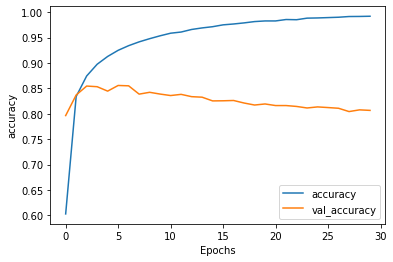

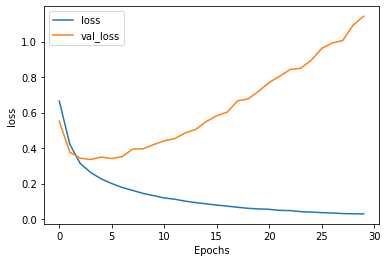

In [12]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### **Predicting sentences**

In [17]:
new_sentences = [
    "If stupidity was a profession then you’d be a billionaire.",
                        "Don’t talk while I am interrupting!",
                        "Today is bright and sunny day"
]
# Sequencing
sequences = tokenizer.texts_to_sequences(new_sentences)
# Padding
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
# Predicting
print(np.round(model.predict(padded),3))

[[0.   ]
 [0.001]
 [0.003]]
